In [13]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

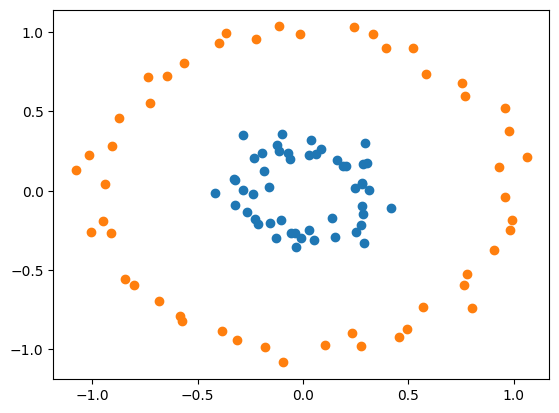

In [14]:
# 次のデータで非線形分離を考える
x, label = make_circles(n_samples=100, noise=0.05, random_state=42, factor=0.3)

plt.scatter(x[label==1][:, 0], x[label==1][:, 1])
plt.scatter(x[label==0][:, 0], x[label==0][:, 1])
plt.show()

In [15]:
# まずはそのままsvmを実装しよう
y = label
X = x

args = {"C": 10, "kernel": "linear"}

# インスタンス生成
svc = SVC(**args) #WRITE ME

# 学習
# WRITE ME
svc.fit(X, y)

print("svc score: ", svc.score(X,y))

svc score:  0.67


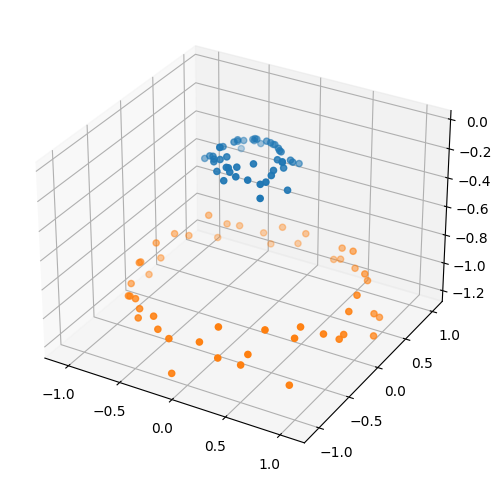

In [16]:
# 三次元に写像してみる
z = -x[:, 0]**2 - x[:, 1]**2
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[label==1][:, 0], x[label==1][:, 1], z[label==1])
ax.scatter(x[label==0][:, 0], x[label==0][:, 1], z[label==0])
plt.show()

In [17]:
# 下記データを用いてsvcモデルを作成しよう
X_3d = np.hstack((x, z.reshape(-1,1)))
y_3d = label

args = {"C": 10, "kernel": "linear"}
# インスタンス生成
svc_3d = SVC(**args) #WRITE ME

# 学習
svc_3d.fit(X_3d, y_3d)

# 精度確認
print("svc score: ", svc_3d.score(X_3d,y_3d))

svc score:  1.0


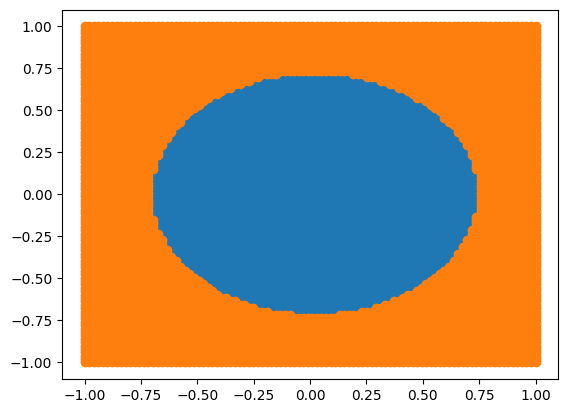

In [18]:
# 分離面を確認
n = 100

x_view = np.linspace(-1, 1, n)
y_view = np.linspace(-1, 1, n)
xx, yy = np.meshgrid(x_view, y_view)
zz = -xx.reshape(-1, 1)**2-yy.reshape(-1, 1)**2

X_pred = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1,1)])
y_pred = svc_3d.predict(X_pred)

plt.scatter(X_pred[y_pred==1][:, 0], X_pred[y_pred==1][:, 1])
plt.scatter(X_pred[y_pred==0][:, 0], X_pred[y_pred==0][:, 1])
plt.show()

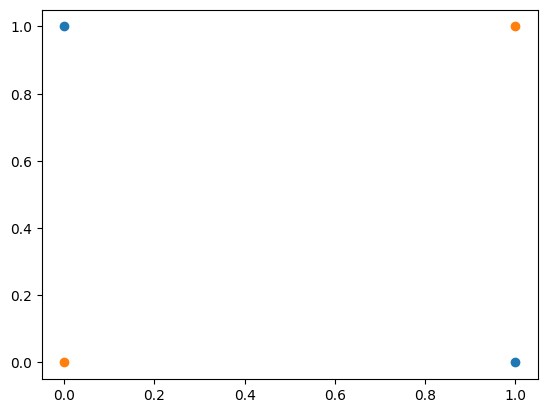

In [19]:
# 次のデータで非線形分類を行なってみよう（どんな変換を考えれば良いだろうか？）->できなくてもいいので，考えてor調べてみてください
X_xor = np.array([[1, 1],
                  [1, 0],
                  [0, 1],
                  [0, 0]])
y_xor = np.array([0,1,1,0])
plt.scatter(X_xor[y_xor==1][:, 0], X_xor[y_xor==1][:, 1])
plt.scatter(X_xor[y_xor==0][:, 0], X_xor[y_xor==0][:, 1])
plt.show()

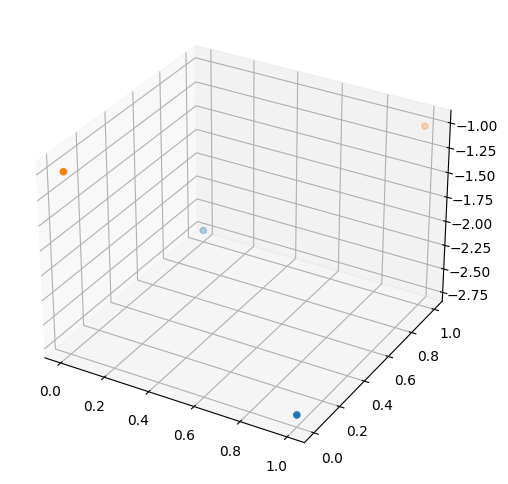

In [20]:
def RBF(x, y):
    _ = x - y
    return -np.exp(_**2)/2*np.sqrt(2)**2
z_xor = RBF(X_xor[:, 0], X_xor[:, 1])#WRITE ME

# 以下は変えなくて大丈夫です
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_xor[y_xor==1][:, 0], X_xor[y_xor==1][:, 1], z_xor[y_xor==1])
ax.scatter(X_xor[y_xor==0][:, 0], X_xor[y_xor==0][:, 1], z_xor[y_xor==0])
plt.show()

In [23]:
# z_xorが作れたら分類器を作成しよう
x_xor_3d = np.hstack((X_xor, z_xor.reshape(-1,1)))

# インスタンス生成
svc_xor = SVC(**args) # WRITE ME

# 学習
svc_xor.fit(x_xor_3d, y_xor)
print("svc xor score:",svc_xor.score(x_xor_3d, y_xor))

svc xor score: 1.0


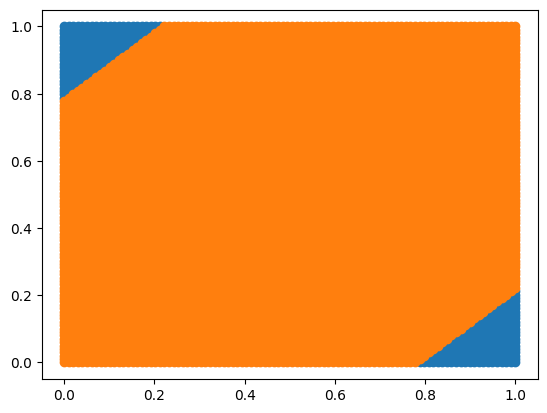

In [24]:
n = 100

x_view = np.linspace(0, 1, n)
y_view = np.linspace(0, 1, n)
xx, yy = np.meshgrid(x_view, y_view)
zz = RBF(xx, yy)

X_pred = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1,1)])
y_pred = svc_xor.predict(X_pred)

plt.scatter(X_pred[y_pred==1][:, 0], X_pred[y_pred==1][:, 1])
plt.scatter(X_pred[y_pred==0][:, 0], X_pred[y_pred==0][:, 1])
plt.show()